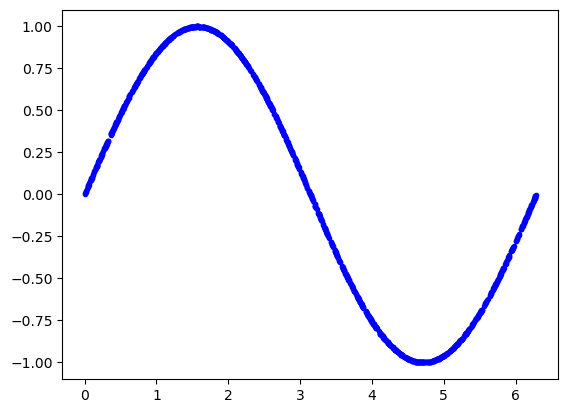

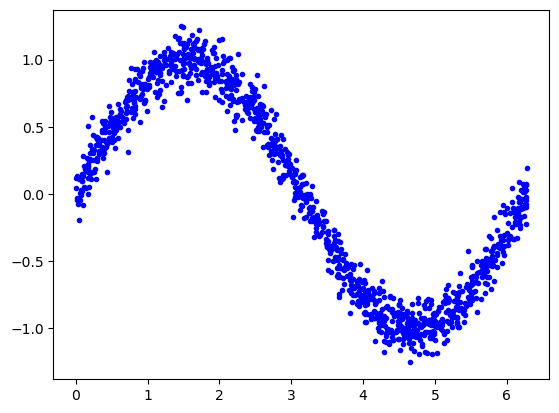

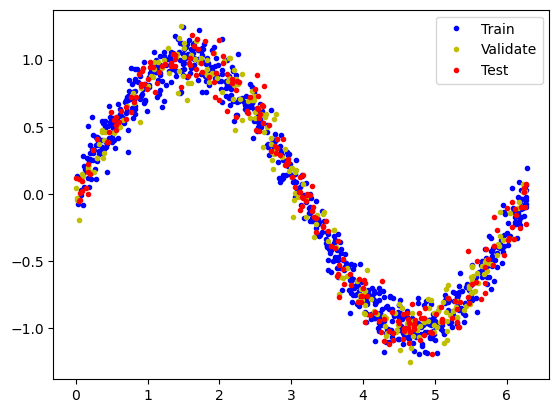

d:\opt\WingetApps_Ddrive\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
# TensorFlow is an open source machine learning library
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

# We'll use Keras to create a simple model architecture
# Note: Changed tf.keras below to tensorflow.keras (code from the book)
from tensorflow.keras import layers

# Define the number of nodes in each layer of the network
# Layer1 with 24 and Layer2 with 16 nodes is better than 16 and 24 respectively.
DENSE1_SIZE = 32
DENSE2_SIZE = 16
NUM_OF_EPOCHS = 900 #Changed 1500 to 900 because no change in loss after 800
BATCH_SIZE = 16

# We'll generate this many sample datapoints
SAMPLES = 1200
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
# You can generate only a half of the sine wave by changing high from 2pi to pi
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)
# Calculate the corresponding sine values
y_values = np.sin(x_values)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

# Add a small random number to each y value
# When the number of Layer 1 and 2 nodes are increased, the noise level
# from 0.001 to some higher value (0.01, etc) still impacts less the quality
# of predictions.
y_values += 0.1 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

# Activation function used here is relu (Rectified Linear Unit)
def relu(input):
    return max(0.0, input)

model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(DENSE1_SIZE, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(DENSE2_SIZE, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()



In [2]:
# 0. Did not get the same accurate predection as shown in the book epochs=600
# 1. So, increased the epochs from 600 to 1000 to see if there is any improvement
# Saw a great improvment on the negative cycle, which was closer to actual
# 2. Increased the epochs still further from 1000 to 1200 to see if it improves further
# 3. Still some error near negative peak, so changed it from 1200 to 1500
# 4. So far, the batch size was kept at 16. Now epochs=1500 and batch_size=32 tried out
# The previous run +v peak also got affected a bit, but -ve peak became better
# 5. Change now epochs=1500 and batch_size=64, it became worse.
# 6. Went back to epochs=1500 and batch_size=16
# 7. Error does not improve beyond Epoch=1000, so reduced it from 1500 to 1000
history_2 = model_2.fit(x_train, y_train, epochs=NUM_OF_EPOCHS, batch_size=BATCH_SIZE,
validation_data=(x_validate, y_validate))


Epoch 1/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6892 - mae: 0.7347 - val_loss: 0.3884 - val_mae: 0.5383
Epoch 2/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3635 - mae: 0.5208 - val_loss: 0.3038 - val_mae: 0.4736
Epoch 3/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2816 - mae: 0.4559 - val_loss: 0.2408 - val_mae: 0.4249
Epoch 4/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2206 - mae: 0.4055 - val_loss: 0.1942 - val_mae: 0.3864
Epoch 5/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1816 - mae: 0.3692 - val_loss: 0.1652 - val_mae: 0.3567
Epoch 6/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1595 - mae: 0.3455 - val_loss: 0.1480 - val_mae: 0.3349
Epoch 7/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1461 - mae: 0.3280 - val_loss: 0.1353 - val_mae: 0.3163
Epoch 8/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1356 - mae: 0.3114 - val_loss: 0.1264 - val_mae: 0.3020
Epoch 9/900
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.127

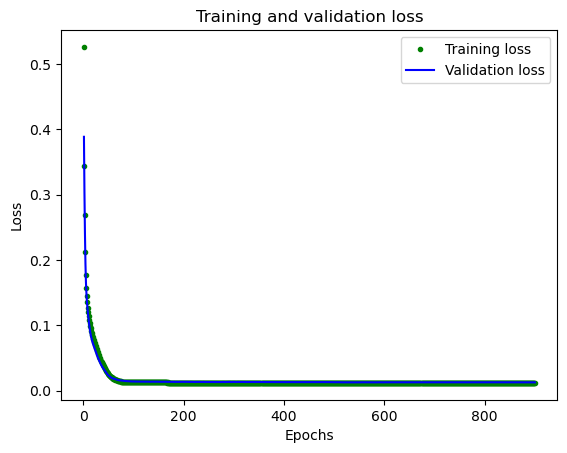

In [3]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


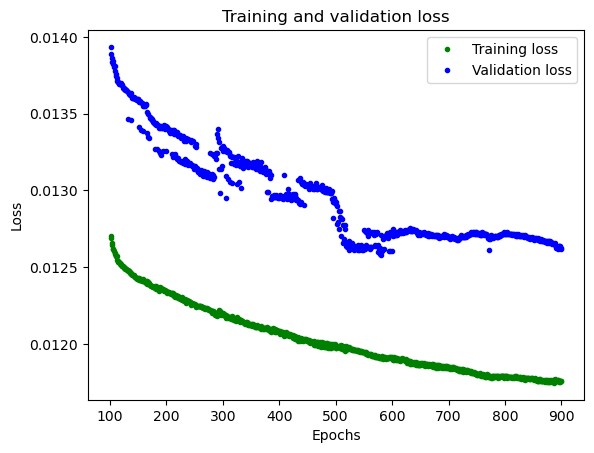

In [4]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

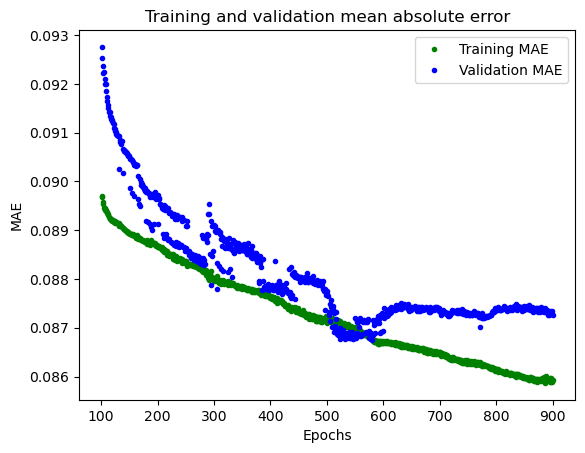

In [5]:
#Finally, we plot the mean absolute error for the same set of epochs:
plt.clf()
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - mae: 0.0845  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


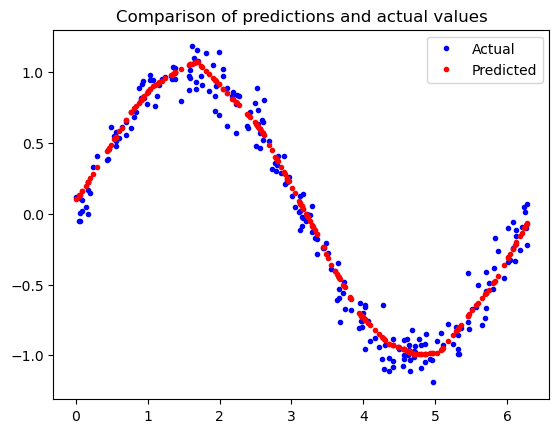

In [6]:
#This cell will evaluate our model against our test data:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()


In [7]:
# Trying out saving the model in h5 file format
# Ref: https://www.tensorflow.org/tutorials/keras/save_and_load
# We have the model_2 object that needs to be saved
# It save text file with Hex numbers in HDF5 format in the current dir
# This model file has a size of 35 KB
model_2.save('Sine_2L_Model.h5')

In [8]:
# Converting a tf.Keras model to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmpn8zhnfug\assets


INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmpn8zhnfug\assets


Saved artifact at 'C:\Users\LENOVO\AppData\Local\Temp\tmpn8zhnfug'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2319122407760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2319168897872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2319168898640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2319168900176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2319168898256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2319168900368: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [9]:
# Save the model in TFlite format whose size is just 5 KB
# It brings down the size from 40 KB to 5 KB, 8 times reduction
with open('Sine_2L_Model.tflite', 'wb') as f:
  f.write(tflite_model)

In [10]:
# Run the inference on TFLITE model on Python ... here itself first
# Let us now first try to run this tflinte model on Python itself
# Ref: https://www.tensorflow.org/lite/guide/inference
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="Sine_2L_Model.tflite")
interpreter.allocate_tensors()

In [11]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_keras_tensor:0', 'index': 0, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall_1:0', 'index': 9, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [12]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.random.random_sample(input_shape)
print(input_data)
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.86388958]]
[[0.7787758]]


In [14]:
input_data.shape

(1, 1)

In [16]:
# Verify if the same data is given to the original model what is the output
output_data = model_2.predict([input_data])
print(output_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
[[0.7787757]]


In [17]:
#print('x_test', x_test)
out_dat = []
for x_dat in x_test:
    in_dat = [[]]
    in_dat[0].append(x_dat)
#    print('x_dat', x_dat, 'in_dat', in_dat)
#    print('input_data:\n', input_data)
    input_data = np.array(in_dat, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    out_dat.append(list(output_data[0]))

print(output_data[0][0])
print(out_dat)

-0.9748167
[[-0.4285163], [0.6959932], [0.036553085], [0.5966869], [-0.9494465], [-0.4480581], [-0.91785693], [0.24842769], [0.91966826], [0.14498371], [-0.9874822], [0.051824868], [-0.88755566], [-0.0002848506], [-0.8291779], [0.44944632], [0.44053805], [1.0521195], [0.9153025], [-0.23291051], [-0.067447186], [0.60231304], [0.80539393], [0.9561994], [-0.23321795], [0.8131331], [0.99031276], [-0.22296357], [1.0554899], [-0.09616417], [0.8678243], [0.85237086], [-0.9860412], [-0.78669983], [0.54401946], [-0.89793384], [0.40239227], [-0.012908936], [-0.21061945], [-0.9267745], [1.072412], [-0.98765475], [0.54512215], [-0.5577047], [0.54078937], [-0.0233078], [0.6170707], [0.76571035], [-0.3584888], [-0.6831566], [1.026011], [-0.24787676], [-0.080443084], [0.7889478], [-0.9751965], [-0.95680594], [-0.87081754], [-0.31289637], [-0.72409624], [-0.97088337], [0.62701046], [0.13525188], [1.0122243], [-0.85850966], [0.6815553], [-0.44098556], [-0.9380303], [-0.08635408], [-0.15436345], [1.0599

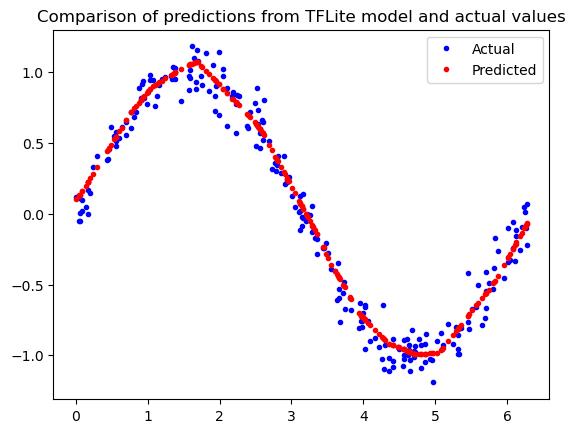

In [18]:
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions from TFLite model and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, out_dat, 'r.', label='Predicted')
plt.legend()
plt.show()

In [19]:
ARENA_BLK_SIZE = 1024

# Function to convert some hex values into an array for C programming
def     dump_tflite_hex(file_name, tflite_model, c_str):

    model_len = len(tflite_model)
    # Add array length at the top of the file
    c_str += '\nunsigned int ' + file_name + '_len = ' + str(model_len) + ';\n\n'

    c_str += '// Since the size is ' + str(model_len)
    c_str += ' for this model the Tensor arena size needs to be\n'
    c_str += '#define TENSOR_ARENA_SIZE ' \
                + str(((model_len//ARENA_BLK_SIZE) + 1)//2) \
                + '*1024\n\n'

    # Declare C variable
    c_str += 'unsigned char ' + file_name + '[] = {'
    hex_array = []
    for i, val in enumerate(tflite_model):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(tflite_model):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    return c_str

In [20]:
# Function to convert some hex values into an array for C programming
import time, sys

def hex_to_c_array(tflite_model, file_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + file_name.upper() + '_H\n'
    c_str += "#define " + file_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Mouli Sankaran \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(tf.__version__) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", tf.__version__, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n'

# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(DENSE1_SIZE) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(DENSE2_SIZE) + ';\n'

    c_str = dump_tflite_hex(file_name, tflite_model, c_str)

# Close out header guard
    c_str += '#endif //' + file_name.upper() + '_H'

    return c_str

In [21]:
# Write TFLite model to a C source (or header) file
with open("sine_2L_model_tflite" + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, "sine_2L_model_tflite"))

This model data was generated on: Wed Sep 25 12:21:52 2024
Tools used: Python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)] 
 Numpy: 1.24.3 
 TensorFlow: 2.17.0 
 Keras:  3.5.0 


